In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import sys
#sys.path.append("/ahg/regevdata/projects/Cell2CellCommunication/code/MIMOSCA")
import perturbseq as perturb

%matplotlib inline
import matplotlib.pyplot as plt


sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.set_figure_params(dpi=200, color_map='viridis')
sc.logging.print_versions()
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

The `sinfo` package has changed name and is now called `session_info` to become more discoverable and self-explanatory. The `sinfo` PyPI package will be kept around to avoid breaking old installs and you can downgrade to 0.3.2 if you want to use it without seeing this message. For the latest features and bug fixes, please install `session_info` instead. The usage and defaults also changed slightly, so please review the latest README at https://gitlab.com/joelostblom/session_info.
-----
anndata     0.7.6
scanpy      1.7.2
sinfo       0.3.4
-----
PIL                 8.2.0
anyio               NA
appnope             0.1.2
attr                20.3.0
babel               2.9.0
backcall            0.2.0
bottleneck          1.3.2
brotli              NA
cairo               1.20.1
certifi             2020.12.05
cffi                1.14.5
chardet             4.0.0
cloudpickle         1.6.0
colorama            0.4.4
cycler              0.10.0
cython_runtime      NA
cytoolz             0.11.0
dask  

In [2]:
OUT='/Users/ursuo/Documents/research/baf/data/2021-06-17/share/2022-11-22/'
FIGS=OUT

In [3]:
#density embeddings
#bring the atac counts and LSI
f='/Users/ursuo/Documents/research/baf/data/2021-06-17/share/2022-11-22/atac1.highqcells.FRiP.0.2.MIN_FRAGS.1000.MIN_PEAK.0.MIN_TSS.1.SUBS.full.LSI.csv'
cell2lsi=pd.read_csv(f,sep='\t')

In [4]:
lsadata=sc.AnnData(cell2lsi.iloc[:,1:31])
lsadata

AnnData object with n_obs × n_vars = 2383 × 30

In [5]:
#add the ko label
ko=[]
reps=[]
el_names=list(cell2lsi.index)
for i in range(lsadata.n_obs):
    el_name=el_names[i]
    items=el_name.split(',')[3].split('_')
    ko_here=items[0]
    rep_here=items[1]
    ko.append(ko_here)
    reps.append(items[0]+'_'+items[1])
    
lsadata.obs['ko']=ko
lsadata.obs['rep']=reps

In [6]:
f='/Users/ursuo/Documents/research/baf/data/2021-06-17/share/2022-11-22/FRiP.0.2.MIN_FRAGS.1000.MIN_PEAK.0.MIN_TSS.1.SUBS.full.umap.csv'
umap_r=pd.read_csv(f,sep='\t')
umap_r.head()

,UMAP_1,UMAP_2
"R1.30,R2.68,R3.88,ARID1A_rep2",-1.393302,0.137543
"R1.78,R2.87,R3.52,BRD9_rep2",3.483831,-1.384405
"R1.30,R2.96,R3.61,ARID1A_rep2",4.838845,-2.304625
"R1.44,R2.64,R3.87,SMARCA4_rep2",-2.535998,2.361482
"R1.32,R2.03,R3.05,ARID1A_rep2",-0.982391,1.051928


In [7]:
lsadata.obsm['X_umap']=np.array(umap_r.loc[lsadata.obs_names,:])

In [8]:
sc.tl.embedding_density(lsadata, basis='umap', groupby='ko')

... storing 'ko' as categorical
... storing 'rep' as categorical
computing density on 'umap'
--> added
    'umap_density_ko', densities (adata.obs)
    'umap_density_ko_params', parameter (adata.uns)


In [9]:
sc.set_figure_params(figsize=(5,5))
sc.settings.figdir=OUT

/Users/ursuo/anaconda3/lib/python3.8/site-packages/scanpy/plotting/_tools/__init__.py:1186: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("YlOrRd"))
  color_map.set_over('black')
/Users/ursuo/anaconda3/lib/python3.8/site-packages/scanpy/plotting/_tools/__init__.py:1187: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("YlOrRd"))
  color_map.set_under('lightgray')
/Users/ursuo/anaconda3/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:364: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously

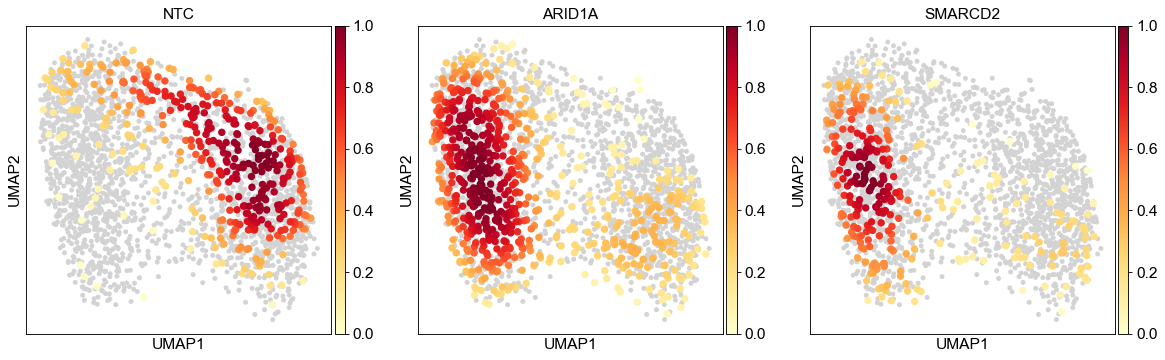

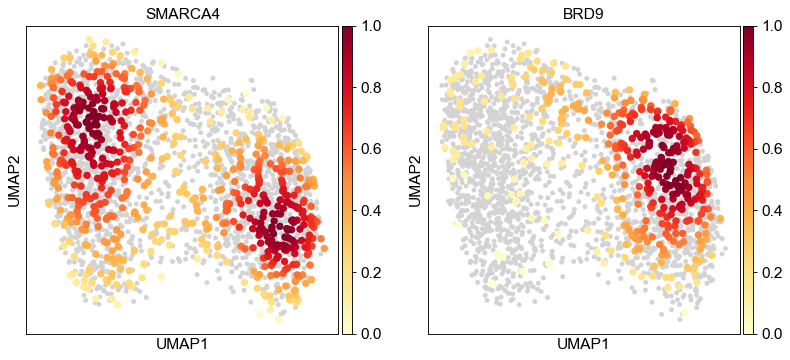

In [10]:
sc.pl.embedding_density(lsadata, basis='umap', key='umap_density_ko',
                        group=['NTC','ARID1A','SMARCD2'],ncols=3)
sc.pl.embedding_density(lsadata, basis='umap', key='umap_density_ko',
                        group=['SMARCA4','BRD9'],ncols=2)

In [11]:
lsadata

AnnData object with n_obs × n_vars = 2383 × 30
    obs: 'ko', 'rep', 'umap_density_ko'
    uns: 'umap_density_ko_params'
    obsm: 'X_umap'

In [16]:
import perturbseq as perturb

In [17]:
?perturb.pp.split_train_valid_test

In [20]:
lsadata.obs['train_test']=perturb.pp.split_train_valid_test(lsadata,training_proportion=0.5,validation_proportion=0.2,test_proportion=0.3)

splitting train    1191
test      715
valid     477
Name: train_valid_test, dtype: int64


[[-7.21905589e-01  8.13844502e-01 -4.16089058e-01 ... -4.35502052e+00
   8.49216521e-01  2.31328821e+00]
 [ 2.87584215e-01  1.63794775e-03 -4.21686806e-02 ... -8.89695436e-02
  -8.05353001e-03  1.13087147e-02]
 [ 7.68065453e-01  3.29607993e-01 -9.65853781e-03 ... -1.17147975e-01
  -6.56427741e-01 -4.09543850e-02]
 ...
 [-1.93181574e-01 -5.93413673e-02 -9.51646864e-02 ...  9.12201926e-02
   2.18547091e-01  9.17406827e-02]
 [ 6.05342329e-01 -5.22846393e-02  4.22246233e-02 ...  1.55767754e-01
   4.99882251e-02  6.63452223e-02]
 [-2.12286394e-02  1.12069501e-02  1.83469951e-02 ... -3.23312059e-02
   1.08615033e-01 -5.68202743e-03]]
[1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 0 1 0 0 1 1 0 0 1 0 1 0 0 1 1 1 0 0 0 0 1
 0 0 1 1 0 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1 1 0 0 1 1 0 1 0 0 1 0 0 1
 1 1 1 1 0 1 0 0 1 1 0 0 1 0 0 1 0 0 1 0 1 1 1 1 1 1 0 0 0 1 1 1 0 1 0 0 0
 1 0 0 0 1 0 1 0 1 1 1 1 0 1 1 0 1 0 1 0 0 1 0 1 1 0 1 1 1 0 0 0

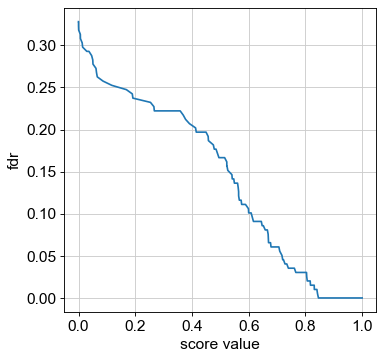

In [325]:
p='ARID1A'
c='NTC'
ko='ko'
data_here=lsadata[lsadata.obs['ko'].isin([p,c]),:]
data_here=data_here[data_here.obs['train_test']=='train',:]

X=data_here.X
y=np.array(1*(data_here.obs['ko']==p))

print(X)
print(y)

from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(X, y)

lsadata.obs['pred']=clf.predict(lsadata.X)
lsadata.obs['pred_proba']=clf.predict_proba(lsadata.X)[:,1]


test_data=lsadata[lsadata.obs['train_test']=='test',:]

valid_data=lsadata[lsadata.obs['train_test']=='valid',:]
valid_data=valid_data[valid_data.obs['ko'].isin([c,p]),:]

my_fdr=0.1
chosen_score=1

vals=list(set(valid_data.obs['pred_proba']))
vals.sort()
precision_recall=pd.DataFrame({'value':vals,'fdr':1})
for v_idx in range(len(vals)):
    v=vals[v_idx]
    predicted=1*(valid_data.obs['pred_proba']>v)
    trues=1*(valid_data.obs['ko']==p)
    tp=np.sum(np.multiply(predicted,trues))
    fp=np.sum(predicted)-tp
    fdr=fp/len(predicted)
    precision_recall.iloc[v_idx,1]=fdr
    if fdr<=my_fdr:
        if chosen_score==1:
            chosen_score=v
print('chosen score at FDR',chosen_score)
plt.plot(vals,precision_recall['fdr'])
plt.xlabel('score value')
plt.ylabel('fdr')

fractions=pd.DataFrame({'pred':0,'total':0,
    'fraction_cBAF':0},index=set(test_data.obs['ko']))
for item in fractions.index:
    total=sum(test_data.obs['ko']==item)
    predicted=sum(test_data[test_data.obs['ko']==item,:].obs['pred_proba']>chosen_score)
    fractions.loc[item,'fraction_cBAF']=(1.0*predicted)/total
    fractions.loc[item,'pred']=predicted
    fractions.loc[item,'total']=total
print(fractions)
fractions_share=fractions



In [326]:
general_palette={'NTC':'orange','ARID1A':'royalblue',
                     'SMARCD2':'lightblue','BRD9':'yellowgreen','SMARCA4':'lightgray'}

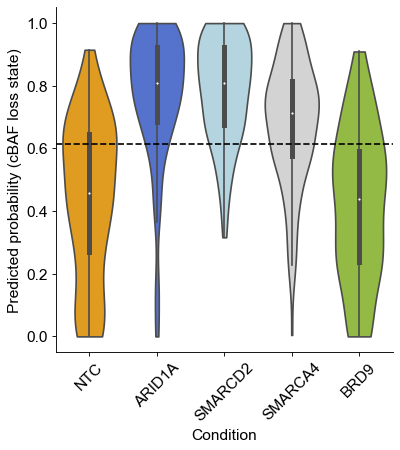

In [328]:
import seaborn as sns
sns.catplot(data=test_data.obs,x=ko,y='pred_proba',kind='violin',
            order=['NTC','ARID1A','SMARCD2','SMARCA4','BRD9'],cut=0,width=0.8,scale='width',
            palette=general_palette,
            aspect_ratio=0.1)
plt.grid(False)
plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees
plt.axhline(y=chosen_score,color='black',linestyle='--')
plt.ylabel('Predicted probability (cBAF loss state)')
plt.xlabel('Condition')
plt.grid(False)
plt.savefig(FIGS+'classifier_atac.pdf',transparent=True,bbox_inches='tight')
plt.savefig(FIGS+'classifier_atac.png',transparent=True,bbox_inches='tight')


In [327]:
FIGS

'/Users/ursuo/Documents/research/baf/data/2022-03-27/Figures/'

In [310]:
#same for the single perturbation data
DATA="/Users/ursuo/Documents/research/baf/data/2022-03-27/single_guide"
FIGS="/Users/ursuo/Documents/research/baf/data/2022-03-27/Figures/"
pref=DATA+'/Baf.single_gene'

In [311]:
adata=sc.read(pref+'.guide_qc.lm.h5ad')
adata

Only considering the two last: ['.lm', '.h5ad'].
Only considering the two last: ['.lm', '.h5ad'].


AnnData object with n_obs × n_vars = 38677 × 1246
    obs: 'batch', 'n_genes', 'percent_mito', 'n_counts', 'batch_num11', 'batch_num3', 'batch_num0', 'batch_num12', 'batch_num4', 'batch_num9', 'batch_num6', 'batch_num5', 'batch_num14', 'batch_num8', 'batch_num13', 'batch_num2', 'batch_num10', 'batch_num1', 'batch_num7', 'louvain', 'BCL7B_1', 'BCL7B_4', 'SMARCD3_4', 'DPF1_3', 'SMARCA2_3', 'PBRM1_3', 'SMARCA4_7', 'SMARCC1_5', 'SMARCC2_4', 'SS18_3', 'ACTL6B_1', 'SMARCD1_2', 'BRD9_1', 'SMARCE1_3', 'PHF10_3', 'NTC6_IG1216445', 'ARID1A_7', 'BCL7C_3', 'BRD7_4', 'DPF3_2', 'PBRM1_1', 'SMARCB1_1', 'SMARCB1_7', 'DPF1_4', 'BCL7C_1', 'ARID2_4', 'GLTSCR1L_2', 'NTC5_mNTC100A67005', 'SMARCA2_4', 'GLTSCR1L_3', 'DPF2_2', 'SMARCA4_1', 'BCL7A_4', 'DPF1_2', 'BRD9_3', 'PHF10_4', 'SMARCE1_2', 'ACTL6B_3', 'SMARCD3_2', 'SMARCD2_2', 'BCL7B_3', 'SMARCD1_3', 'SMARCC2_3', 'ACTL6A_2', 'DPF1_1', 'SMARCD3_1', 'SMARCC1_7', 'ACTL6A_1', 'BRD7_3', 'SMARCC2_1', 'ARID1A_2', 'SMARCD2_1', 'SS18_4', 'DPF2_4', 'SS18_2', 'GLTSC

splitting train    19338
test     11604
valid     7735
Name: train_valid_test, dtype: int64
[[-0.33288342 -0.7120449  -0.14341603 ...  0.8825085   0.3453766
  -0.69705236]
 [ 2.110476   -0.7205957  -0.1670064  ...  0.9556479   0.58623433
  -3.2089837 ]
 [-0.30311665 -0.6795548  -0.15944253 ... -0.15627024  1.0607445
  -0.3167527 ]
 ...
 [-0.28465608 -0.6914626  -0.08004821 ... -0.3261914   1.6185293
   0.67963845]
 [-0.31893548 -0.71361685 -0.1563549  ... -3.1921163   0.49598286
  -1.0549395 ]
 [-0.33048975 -0.6906645  -0.15036744 ...  0.47455782  0.5758678
   1.262944  ]]
[0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0
 1 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 1 0 1 0 0 1 1 0 0 0 0 1 0 0 1 0 1 0 0
 0 1 1 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 1
 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 1 1 1 0 0 0 0
 1 0 0 0 1 0 0 1 0 0 0 0 0 1 1 0 1 0 1 0 1 0 

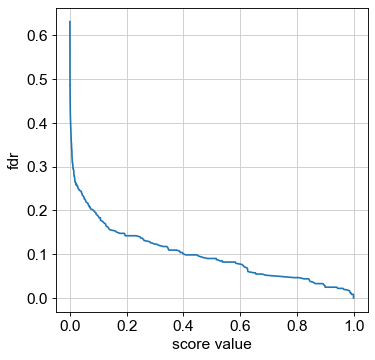

In [336]:
p='ARID1A'
c='control'
ko='gene.compact'

adata.obs['train_test']=perturb.pp.split_train_valid_test(adata,
                                                            training_proportion=0.5,validation_proportion=0.2,test_proportion=0.3)

data_here=adata[adata.obs[ko].isin([p,c]),:]
data_here=data_here[data_here.obs['train_test']=='train',:]

X=data_here.X
y=np.array(1*(data_here.obs[ko]==p))

print(X)
print(y)

from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(X, y)

adata.obs['pred']=clf.predict(adata.X)
adata.obs['pred_proba']=clf.predict_proba(adata.X)[:,1]

test_data=adata[adata.obs['train_test']=='test',:]

valid_data=adata[adata.obs['train_test']=='valid',:]
valid_data=valid_data[valid_data.obs[ko].isin([c,p]),:]

my_fdr=0.1
chosen_score=1

vals=list(set(valid_data.obs['pred_proba']))
vals.sort()
precision_recall=pd.DataFrame({'value':vals,'fdr':1})
for v_idx in range(len(vals)):
    v=vals[v_idx]
    predicted=1*(valid_data.obs['pred_proba']>v)
    trues=1*(valid_data.obs[ko]==p)
    tp=np.sum(np.multiply(predicted,trues))
    fp=np.sum(predicted)-tp
    fdr=fp/len(predicted)
    precision_recall.iloc[v_idx,1]=fdr
    if fdr<=my_fdr:
        if chosen_score==1:
            chosen_score=v
print('chosen score at FDR',chosen_score)
plt.plot(vals,precision_recall['fdr'])
plt.xlabel('score value')
plt.ylabel('fdr')

ko='guide.compact'
fractions=pd.DataFrame({'pred':0,'total':0,
    'fraction_cBAF':0},index=set(test_data.obs[ko]))
for item in fractions.index:
    total=sum(test_data.obs[ko]==item)
    predicted=sum(test_data[test_data.obs[ko]==item,:].obs['pred_proba']>chosen_score)
    fractions.loc[item,'fraction_cBAF']=(1.0*predicted)/total
    fractions.loc[item,'pred']=predicted
    fractions.loc[item,'total']=total
print(fractions)


In [337]:
guides=['NTC1_IG345439','ARID1A_3','SMARCD2_3','SMARCA4_4','BRD9_2']
fractions.loc[guides,:].sort_values(by='fraction_cBAF')

,pred,total,fraction_cBAF
BRD9_2,3,60,0.050000
NTC1_IG345439,14,117,0.119658
SMARCA4_4,42,81,0.518519
SMARCD2_3,23,29,0.793103
ARID1A_3,61,76,0.802632


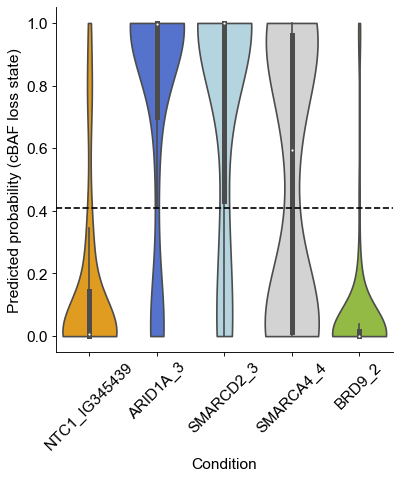

In [338]:
import seaborn as sns
sns.catplot(data=test_data.obs,x=ko,y='pred_proba',kind='violin',cut=0,width=0.8,scale='width',
            palette={'NTC1_IG345439':'orange','ARID1A_3':'royalblue',
                     'SMARCD2_3':'lightblue','BRD9_2':'yellowgreen','SMARCA4_4':'lightgray'},
            #inner="quartile",
            order=guides,aspect_ratio=0.1)
plt.grid(False)
plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees
plt.axhline(y=chosen_score,color='black',linestyle='--')
plt.ylabel('Predicted probability (cBAF loss state)')
plt.xlabel('Condition')
plt.grid(False)
plt.savefig(FIGS+'classifier_single.pdf',transparent=True,bbox_inches='tight')
plt.savefig(FIGS+'classifier_single.png',transparent=True,bbox_inches='tight')


In [339]:
guides=[]
palette={}
for p in ['NTC','ARID1A','SMARCD2','SMARCA4','BRD9']:
    for i in fractions.index:
        if p in i:
            guides.append(i)
            palette[i]=general_palette[p]
print(fractions.loc[guides,:])
#fractions.loc[guides,:].sort_values(by='fraction_cBAF')

                    pred  total  fraction_cBAF
NTC5_mNTC100A67005    10     72       0.138889
NTC1_IG345439         14    117       0.119658
NTC7_IG1144056        13     93       0.139785
NTC2_IG216151          3     14       0.214286
NTC6_IG1216445        13     83       0.156627
ARID1A_5              33     63       0.523810
ARID1A_2              12     18       0.666667
ARID1A_7              19     24       0.791667
ARID1A_3              61     76       0.802632
SMARCD2_4             20     40       0.500000
SMARCD2_1             37     59       0.627119
SMARCD2_2             40     58       0.689655
SMARCD2_3             23     29       0.793103
SMARCA4_7              1      2       0.500000
SMARCA4_4             42     81       0.518519
SMARCA4_5              8     15       0.533333
SMARCA4_1             27     57       0.473684
BRD9_3                 2     59       0.033898
BRD9_4                12     85       0.141176
BRD9_1                 2     55       0.036364
BRD9_2       

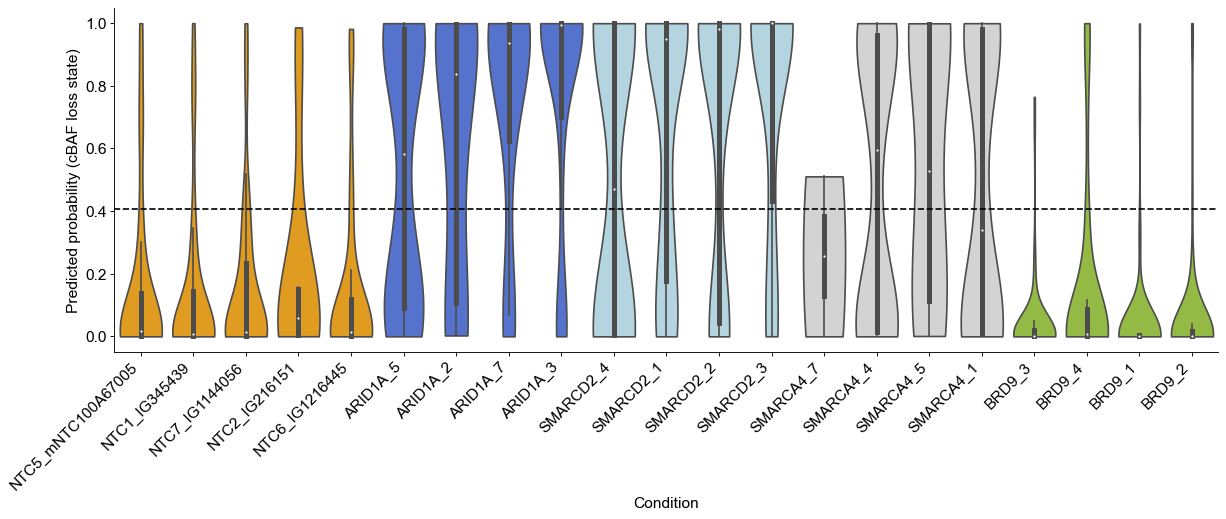

In [340]:
import seaborn as sns
sns.catplot(data=test_data.obs,x=ko,y='pred_proba',kind='violin',cut=0,width=0.8,scale='width',
            palette=palette,height=5,
            #inner="quartile",
            order=guides,aspect=3)
plt.grid(False)
plt.xticks(rotation = 45,ha='right',) # Rotates X-Axis Ticks by 45-degrees
plt.axhline(y=chosen_score,color='black',linestyle='--')
plt.ylabel('Predicted probability (cBAF loss state)')
plt.xlabel('Condition')
plt.grid(False)
plt.savefig(FIGS+'classifier_single_guides.pdf',transparent=True,bbox_inches='tight')
plt.savefig(FIGS+'classifier_single_guides.png',transparent=True,bbox_inches='tight')


In [341]:
fractions_share.loc[guides_share,'fraction_cBAF']

NTC        0.330709
ARID1A     0.850746
SMARCD2    0.857143
SMARCA4    0.662722
BRD9       0.236220
Name: fraction_cBAF, dtype: float64

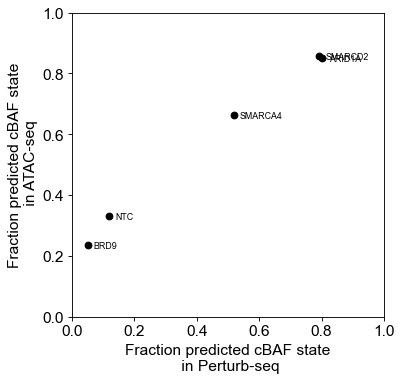

In [343]:
guides=['NTC1_IG345439','ARID1A_3','SMARCD2_3','SMARCA4_4','BRD9_2']
guides_share=['NTC','ARID1A','SMARCD2','SMARCA4','BRD9']
plt.scatter(fractions.loc[guides,'fraction_cBAF'],
        fractions_share.loc[guides_share,'fraction_cBAF'],color='black')
plt.grid(False)
plt.xlim(0,1)
plt.ylim(0,1)
plt.xlabel('Fraction predicted cBAF state\n in Perturb-seq')
plt.ylabel('Fraction predicted cBAF state\n in ATAC-seq')

xs=fractions.loc[guides,'fraction_cBAF']
ys=fractions_share.loc[guides_share,'fraction_cBAF']
xplus=0.02
yplus=-0.01

for i, txt in enumerate(guides_share):
    plt.annotate(txt, (xs[i]+xplus, ys[i]+yplus),color='black',fontsize=8)
plt.savefig(FIGS+'classifier_vs_classifier.pdf',transparent=True,bbox_inches='tight')
plt.savefig(FIGS+'classifier_vs_classifier.png',transparent=True,bbox_inches='tight')


In [345]:
FIGS="/Users/ursuo/Documents/research/baf/data/2022-03-27/Figures/"
#combo data
COMBO_DATA="/Users/ursuo/Documents/research/baf/data/2022-03-27/combo2"
pref=COMBO_DATA+'/Baf.combo'
adata=sc.read(pref+'.analysis.h5ad')
adata

Only considering the two last: ['.analysis', '.h5ad'].
Only considering the two last: ['.analysis', '.h5ad'].


AnnData object with n_obs × n_vars = 7889 × 20018
    obs: 'n_genes', 'batch', 'BCL7C_2', 'NTC6_IG1216445', 'SMARCA2_4', 'NTC7_IG1144056', 'NTC1_IG345439', 'GLTSCR1_1', 'SMARCD1_4', 'ARID1B_4', 'BCL7A_3', 'SMARCD2_3', 'BCL7B_1', 'SMARCA4_4', 'SS18_2', 'ARID1A_3', 'SMARCC2_3', 'BRD9_2', 'GLTSCR1L_3', 'PBRM1_3', 'SMARCE1_1', 'BRD7_2', 'PHF10_1', 'ARID2_1', 'SS18L_1', 'DPF2_4', 'SMARCC1_7', 'SMARCB1_5', 'ARID1B', 'SMARCC2', 'BCL7A', 'SS18', 'GLTSCR1', 'BCL7B', 'SMARCC1', 'SMARCE1', 'SMARCD1', 'GLTSCR1L', 'SMARCB1', 'control', 'cell', 'SMARCA2', 'SMARCA4', 'ARID2', 'PHF10', 'SMARCD2', 'SS18L', 'BRD7', 'BRD9', 'BCL7C', 'PBRM1', 'ARID1A', 'DPF2', 'guide', 'guide.compact', 'gene', 'gene.compact', 'unassigned', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', '0', '2', '1', 'leiden', 'cell_state'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 's

splitting train    3944
test     2367
valid    1578
Name: train_valid_test, dtype: int64
[[-1.0111140e-01  2.7567632e+00 -8.3564900e-02 ... -4.9832594e-01
   4.5016021e-01 -9.5841868e-05]
 [-1.0968525e-01  1.7247192e+00 -9.3876481e-02 ... -5.4401177e-01
  -1.0007555e+00  6.9209486e-01]
 [-7.0103087e-02 -2.1788482e-01 -2.9297743e-02 ... -3.7237057e-01
  -7.8238362e-01 -9.5823473e-01]
 ...
 [-4.2343210e-02 -3.2965714e-01 -5.9666689e-02 ...  3.1197102e+00
   1.2863137e+00  2.8706598e+00]
 [-4.3927893e-02 -3.4685734e-01 -5.6136843e-02 ... -4.4245991e-01
   2.1251528e+00  2.1516695e+00]
 [-3.8060512e-02 -3.2077712e-01 -4.7077760e-02 ... -4.1582870e-01
   7.7003503e-01 -9.2438304e-01]]
[0 1 1 0 1 0 1 0 0 0 1 1 1 0 0 0 0 1 0 1 0 0 1 0 1 0 0 1 0 1 0 0 0 1 0 1 0
 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 1 0 0 0 1 1 0 0 0 1
 0 0 1 0 0 1 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 0 0
 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 1 1 1 0 0 1 1 1 0 0 1 0 1 0 1
 0 0 0 0 0 

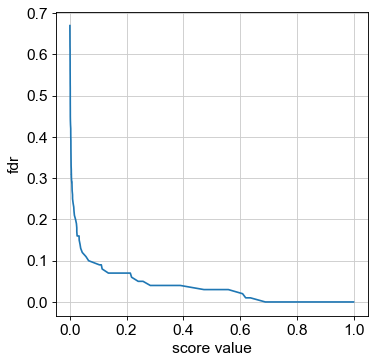

In [354]:
p='ARID1A'
c='control'
ko='gene'

adata.obs['train_test']=perturb.pp.split_train_valid_test(adata,
                                                            training_proportion=0.5,validation_proportion=0.2,test_proportion=0.3)

data_here=adata[adata.obs[ko].isin([p,c]),:]
data_here=data_here[data_here.obs['train_test']=='train',:]

X=data_here.X
y=np.array(1*(data_here.obs[ko]==p))

print(X)
print(y)

from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(X, y)

adata.obs['pred']=clf.predict(adata.X)
adata.obs['pred_proba']=clf.predict_proba(adata.X)[:,1]

test_data=adata[adata.obs['train_test']=='test',:]

valid_data=adata[adata.obs['train_test']=='valid',:]
valid_data=valid_data[valid_data.obs[ko].isin([c,p]),:]

my_fdr=0.1
chosen_score=1

vals=list(set(valid_data.obs['pred_proba']))
vals.sort()
precision_recall=pd.DataFrame({'value':vals,'fdr':1})
for v_idx in range(len(vals)):
    v=vals[v_idx]
    predicted=1*(valid_data.obs['pred_proba']>v)
    trues=1*(valid_data.obs[ko]==p)
    tp=np.sum(np.multiply(predicted,trues))
    fp=np.sum(predicted)-tp
    fdr=fp/len(predicted)
    precision_recall.iloc[v_idx,1]=fdr
    if fdr<=my_fdr:
        if chosen_score==1:
            chosen_score=v
print('chosen score at FDR',chosen_score)
plt.plot(vals,precision_recall['fdr'])
plt.xlabel('score value')
plt.ylabel('fdr')

ko='gene'
fractions=pd.DataFrame({'pred':0,'total':0,
    'fraction_cBAF':0},index=set(test_data.obs[ko]))
for item in fractions.index:
    total=sum(test_data.obs[ko]==item)
    predicted=sum(test_data[test_data.obs[ko]==item,:].obs['pred_proba']>chosen_score)
    fractions.loc[item,'fraction_cBAF']=(1.0*predicted)/total
    fractions.loc[item,'pred']=predicted
    fractions.loc[item,'total']=total
print(fractions)

In [355]:
guides=['control','ARID1A','SMARCD2','SMARCA4','BRD9']
fractions.loc[guides,:].sort_values(by='fraction_cBAF')

,pred,total,fraction_cBAF
BRD9,6,83,0.072289
control,16,149,0.107383
SMARCA4,17,32,0.531250
SMARCD2,14,17,0.823529
ARID1A,45,51,0.882353


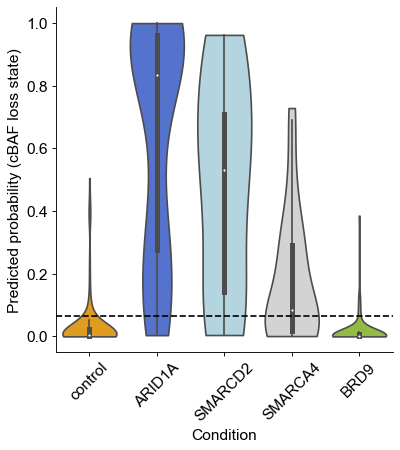

In [356]:
import seaborn as sns
sns.catplot(data=test_data.obs,x=ko,y='pred_proba',kind='violin',cut=0,width=0.8,scale='width',
            palette={'control':'orange','ARID1A':'royalblue',
                     'SMARCD2':'lightblue','BRD9':'yellowgreen','SMARCA4':'lightgray'},
            #inner="quartile",
            order=guides,aspect_ratio=0.1)
plt.grid(False)
plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees
plt.axhline(y=chosen_score,color='black',linestyle='--')
plt.ylabel('Predicted probability (cBAF loss state)')
plt.xlabel('Condition')
plt.grid(False)
plt.savefig(FIGS+'classifier_combo.pdf',transparent=True,bbox_inches='tight')
plt.savefig(FIGS+'classifier_combo.png',transparent=True,bbox_inches='tight')


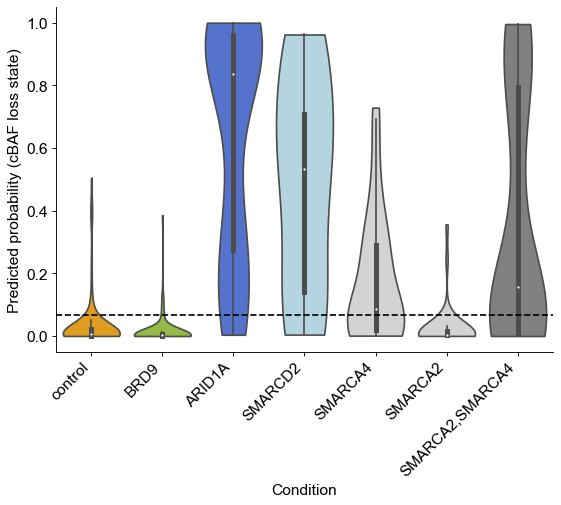

In [357]:
guides=['control','BRD9','ARID1A','SMARCD2','SMARCA4','SMARCA2','SMARCA2,SMARCA4']
palette={'control':'orange','BRD9':'yellowgreen','ARID1A':'royalblue','SMARCD2':'lightblue',
        'SMARCA2':'lightgray','SMARCA4':'lightgray','SMARCA2,SMARCA4':'gray'}

import seaborn as sns
sns.catplot(data=test_data.obs,x=ko,y='pred_proba',kind='violin',cut=0,width=0.8,scale='width',
            palette=palette,height=5,
            #inner="quartile",
            order=guides,aspect=1.5)
plt.grid(False)
plt.xticks(rotation = 45,ha='right',) # Rotates X-Axis Ticks by 45-degrees
plt.axhline(y=chosen_score,color='black',linestyle='--')
plt.ylabel('Predicted probability (cBAF loss state)')
plt.xlabel('Condition')
plt.grid(False)
plt.savefig(FIGS+'classifier_combo_more.pdf',transparent=True,bbox_inches='tight')
plt.savefig(FIGS+'classifier_combo_more.png',transparent=True,bbox_inches='tight')
